
=== Face Detection and Matching System ===
1. Detect faces in a single image
2. Match face between two images
3. Exit
Enter your choice (1-3): 1

=== Single Image Face Detection ===
Enter image path (or press Enter to use crowd image): face1.png
Number of faces detected: 1


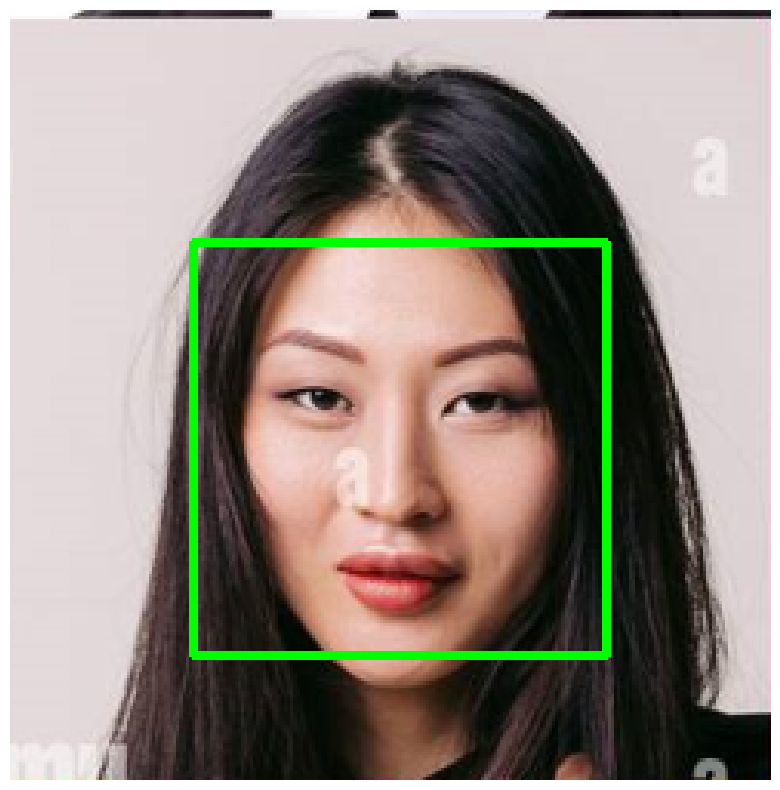


=== Face Detection and Matching System ===
1. Detect faces in a single image
2. Match face between two images
3. Exit
Enter your choice (1-3): 2

=== Face Matching between Images ===
Enter reference image path (or press Enter to use default: face1.png): 
Enter crowd image path (or press Enter to use default: face.jpg): 
Number of faces detected in crowd: 17


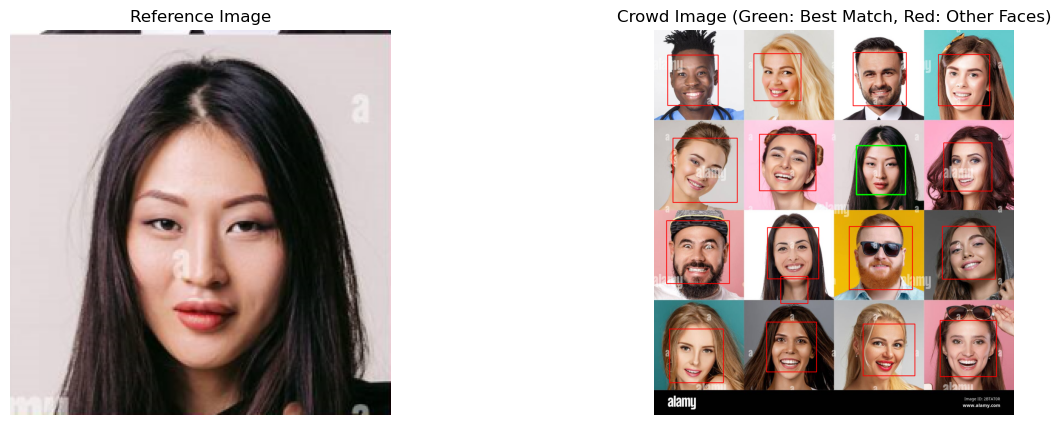


=== Face Detection and Matching System ===
1. Detect faces in a single image
2. Match face between two images
3. Exit
Enter your choice (1-3): 3

Thank you for using the Face Detection and Matching System!


In [10]:
import cv2
import numpy as np
from matplotlib import pyplot as plt
from sklearn.metrics.pairwise import cosine_similarity
import os

def detect_and_match_face(reference_image_path, crowd_image_path):
    face_cascade = cv2.CascadeClassifier(cv2.data.haarcascades + 'haarcascade_frontalface_default.xml')
    face_recognizer = cv2.face.LBPHFaceRecognizer_create()
    
    reference_image = cv2.imread(reference_image_path)
    crowd_image = cv2.imread(crowd_image_path)
    
    if reference_image is None or crowd_image is None:
        print("Error: Could not load one or both images.")
        return
    
    reference_gray = cv2.cvtColor(reference_image, cv2.COLOR_BGR2GRAY)
    crowd_gray = cv2.cvtColor(crowd_image, cv2.COLOR_BGR2GRAY)
    
    reference_faces = face_cascade.detectMultiScale(reference_gray, scaleFactor=1.1, minNeighbors=5)
    
    if len(reference_faces) == 0:
        print("No face detected in reference image.")
        return
    
    x, y, w, h = reference_faces[0]
    reference_face = reference_gray[y:y+h, x:x+w]
    reference_face_resized = cv2.resize(reference_face, (100, 100))
    
    crowd_faces = face_cascade.detectMultiScale(crowd_gray, scaleFactor=1.1, minNeighbors=5)
    print(f"Number of faces detected in crowd: {len(crowd_faces)}")
    
    best_match_score = float('inf')
    best_match_location = None
    
    for (x, y, w, h) in crowd_faces:
        crowd_face = crowd_gray[y:y+h, x:x+w]
        crowd_face_resized = cv2.resize(crowd_face, (100, 100))
        
        difference = cv2.absdiff(reference_face_resized, crowd_face_resized)
        score = np.sum(difference)
        
        if score < best_match_score:
            best_match_score = score
            best_match_location = (x, y, w, h)
        
        cv2.rectangle(crowd_image, (x, y), (x+w, y+h), (0, 0, 255), 2)
    
    if best_match_location is not None:
        x, y, w, h = best_match_location
        cv2.rectangle(crowd_image, (x, y), (x+w, y+h), (0, 255, 0), 3)
    
    plt.figure(figsize=(15, 5))
    
    plt.subplot(121)
    reference_rgb = cv2.cvtColor(reference_image, cv2.COLOR_BGR2RGB)
    plt.imshow(reference_rgb)
    plt.title('Reference Image')
    plt.axis('off')
    
    plt.subplot(122)
    crowd_rgb = cv2.cvtColor(crowd_image, cv2.COLOR_BGR2RGB)
    plt.imshow(crowd_rgb)
    plt.title('Crowd Image (Green: Best Match, Red: Other Faces)')
    plt.axis('off')
    
    plt.show()

def detect_faces_single_image(image_path):
    """Function to detect faces in a single image"""
    face_cascade = cv2.CascadeClassifier(cv2.data.haarcascades + 'haarcascade_frontalface_default.xml')
    image = cv2.imread(image_path)
    
    if image is None:
        print("Error: Could not load image.")
        return
    
    gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    faces = face_cascade.detectMultiScale(gray, scaleFactor=1.1, minNeighbors=5)
    
    print(f"Number of faces detected: {len(faces)}")
    
    for (x, y, w, h) in faces:
        cv2.rectangle(image, (x, y), (x+w, y+h), (0, 255, 0), 2)
    
    plt.figure(figsize=(10, 10))
    plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
    plt.axis('off')
    plt.show()

def display_menu():
    """Display the main menu"""
    print("\n=== Face Detection and Matching System ===")
    print("1. Detect faces in a single image")
    print("2. Match face between two images")
    print("3. Exit")
    return input("Enter your choice (1-3): ")

def main():
    reference_image_path = "face1.png"
    crowd_image_path = "face.jpg"
    
    while True:
        choice = display_menu()
        
        if choice == '1':
            print("\n=== Single Image Face Detection ===")
            image_path = input("Enter image path (or press Enter to use crowd image): ").strip()
            if not image_path:
                image_path = crowd_image_path
            if os.path.exists(image_path):
                detect_faces_single_image(image_path)
            else:
                print("Error: Image file not found!")

        elif choice == '2':
            print("\n=== Face Matching between Images ===")
            ref_path = input(f"Enter reference image path (or press Enter to use default: {reference_image_path}): ").strip()
            crowd_path = input(f"Enter crowd image path (or press Enter to use default: {crowd_image_path}): ").strip()
            
            if not ref_path:
                ref_path = reference_image_path
            if not crowd_path:
                crowd_path = crowd_image_path
                
            if os.path.exists(ref_path) and os.path.exists(crowd_path):
                detect_and_match_face(ref_path, crowd_path)
            else:
                print("Error: One or both image files not found!")

        elif choice == '3':
            print("\nThank you for using the Face Detection and Matching System!")
            break

        else:
            print("\nInvalid choice! Please enter a number between 1 and 3.")

if __name__ == "__main__":
    main()